# Modelling 

The notebook aims to develop a Credit Scoring Model for Bati Bank, using the transactional data from an eCommerce platform. This involves classifying customers as high or low risk for default and developing a predictive model that provides a risk probability and a credit score.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [3]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [4]:
from scripts.credit_scoring_model import *
from scripts.credit_scoring_model import *

In [5]:
# Load the data
data = pd.read_csv('../data/woe_transformed_data.csv')

In [6]:
data.head()

,FraudResult,CustomerId,TransactionDay,Amount,TransactionId,ProductCategory,TransactionYear,ProviderId,StdDevTransactionAmount,label,...,CountryCode,SubscriptionId,AccountId,AverageTransactionAmount,TransactionHour,ProductId,MonetaryAvg_woe,Frequency_woe,Recency_woe,MonetaryTotal_woe
0,-0.044962,CustomerId_1,0.568697,-0.135580,TransactionId_51888,airtime,-0.994246,ProviderId_4,-0.135444,bad,...,0.0,SubscriptionId_4836,AccountId_1074,-0.195113,0.732891,ProductId_10,0.534596,1.371767,6.499419,0.750706
1,-0.044962,CustomerId_10,0.568697,-0.135580,TransactionId_24254,airtime,-0.994246,ProviderId_4,-0.135444,bad,...,0.0,SubscriptionId_4836,AccountId_1074,-0.195113,0.732891,ProductId_3,0.534596,1.371767,6.499419,0.750706
2,-0.044962,CustomerId_1001,0.010834,0.026618,TransactionId_11879,financial_services,-0.994246,ProviderId_5,-0.127996,bad,...,0.0,SubscriptionId_4753,AccountId_661,-0.031720,-1.123951,ProductId_15,-0.467798,0.344219,6.499419,0.750706
3,-0.044962,CustomerId_1002,-0.100739,-0.042316,TransactionId_75390,airtime,-0.994246,ProviderId_5,-0.195419,bad,...,0.0,SubscriptionId_2325,AccountId_662,-0.073921,1.145522,ProductId_1,0.534596,0.344219,4.272146,-0.761040
4,-0.044962,CustomerId_1003,-1.662755,0.026618,TransactionId_20674,financial_services,1.005787,ProviderId_5,-0.133936,bad,...,0.0,SubscriptionId_3559,AccountId_663,-0.039500,0.320259,ProductId_15,-0.467798,0.344219,2.618354,0.750706


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FraudResult               3742 non-null   float64
 1   CustomerId                3742 non-null   object 
 2   TransactionDay            3742 non-null   float64
 3   Amount                    3742 non-null   float64
 4   TransactionId             3742 non-null   object 
 5   ProductCategory           3742 non-null   object 
 6   TransactionYear           3742 non-null   float64
 7   ProviderId                3742 non-null   object 
 8   StdDevTransactionAmount   3742 non-null   float64
 9   label                     3742 non-null   object 
 10  TransactionStartTime      3742 non-null   object 
 11  BatchId                   3742 non-null   object 
 12  RFMS_Score                3742 non-null   float64
 13  TotalTransactionAmount    3742 non-null   float64
 14  PricingS

In [8]:
columns_to_drop=['TransactionId','ProductId','BatchId','AccountId', '','CustomerId','SubscriptionId','TransactionStartTime','CurrencyCode',
    'ProviderId','CountryCode', 'RFMS_Score']
data=data.drop(columns_to_drop, axis=1, errors='ignore')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FraudResult               3742 non-null   float64
 1   TransactionDay            3742 non-null   float64
 2   Amount                    3742 non-null   float64
 3   ProductCategory           3742 non-null   object 
 4   TransactionYear           3742 non-null   float64
 5   StdDevTransactionAmount   3742 non-null   float64
 6   label                     3742 non-null   object 
 7   TotalTransactionAmount    3742 non-null   float64
 8   PricingStrategy           3742 non-null   float64
 9   ChannelId                 3742 non-null   object 
 10  TransactionCount          3742 non-null   float64
 11  Value                     3742 non-null   float64
 12  TransactionMonth          3742 non-null   float64
 13  AverageTransactionAmount  3742 non-null   float64
 14  Transact

In [10]:
# Encode Categorical Features
categorical_columns = ['ProductCategory','ChannelId']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])


In [11]:
# Separate features and target variable
X = data.drop('label', axis=1)  
y = data['label']  # label

In [12]:
# features
print(X.columns)

Index(['FraudResult', 'TransactionDay', 'Amount', 'ProductCategory',
       'TransactionYear', 'StdDevTransactionAmount', 'TotalTransactionAmount',
       'PricingStrategy', 'ChannelId', 'TransactionCount', 'Value',
       'TransactionMonth', 'AverageTransactionAmount', 'TransactionHour',
       'MonetaryAvg_woe', 'Frequency_woe', 'Recency_woe', 'MonetaryTotal_woe'],
      dtype='object')


In [13]:
X.head()

,FraudResult,TransactionDay,Amount,ProductCategory,TransactionYear,StdDevTransactionAmount,TotalTransactionAmount,PricingStrategy,ChannelId,TransactionCount,Value,TransactionMonth,AverageTransactionAmount,TransactionHour,MonetaryAvg_woe,Frequency_woe,Recency_woe,MonetaryTotal_woe
0,-0.044962,0.568697,-0.135580,0,-0.994246,-0.135444,0.164618,2.379557,1,-0.446132,0.000807,0.848684,-0.195113,0.732891,0.534596,1.371767,6.499419,0.750706
1,-0.044962,0.568697,-0.135580,0,-0.994246,-0.135444,0.164618,2.379557,1,-0.446132,0.000807,0.848684,-0.195113,0.732891,0.534596,1.371767,6.499419,0.750706
2,-0.044962,0.010834,0.026618,2,-0.994246,-0.127996,0.165994,-0.349252,2,-0.441579,0.000807,0.848684,-0.031720,-1.123951,-0.467798,0.344219,6.499419,0.750706
3,-0.044962,-0.100739,-0.042316,0,-0.994246,-0.195419,0.165270,2.379557,2,-0.434750,-0.068230,0.848684,-0.073921,1.145522,0.534596,0.344219,4.272146,-0.761040
4,-0.044962,-1.662755,0.026618,2,1.005787,-0.133936,0.165994,-0.349252,2,-0.440441,0.000807,-0.874040,-0.039500,0.320259,-0.467798,0.344219,2.618354,0.750706


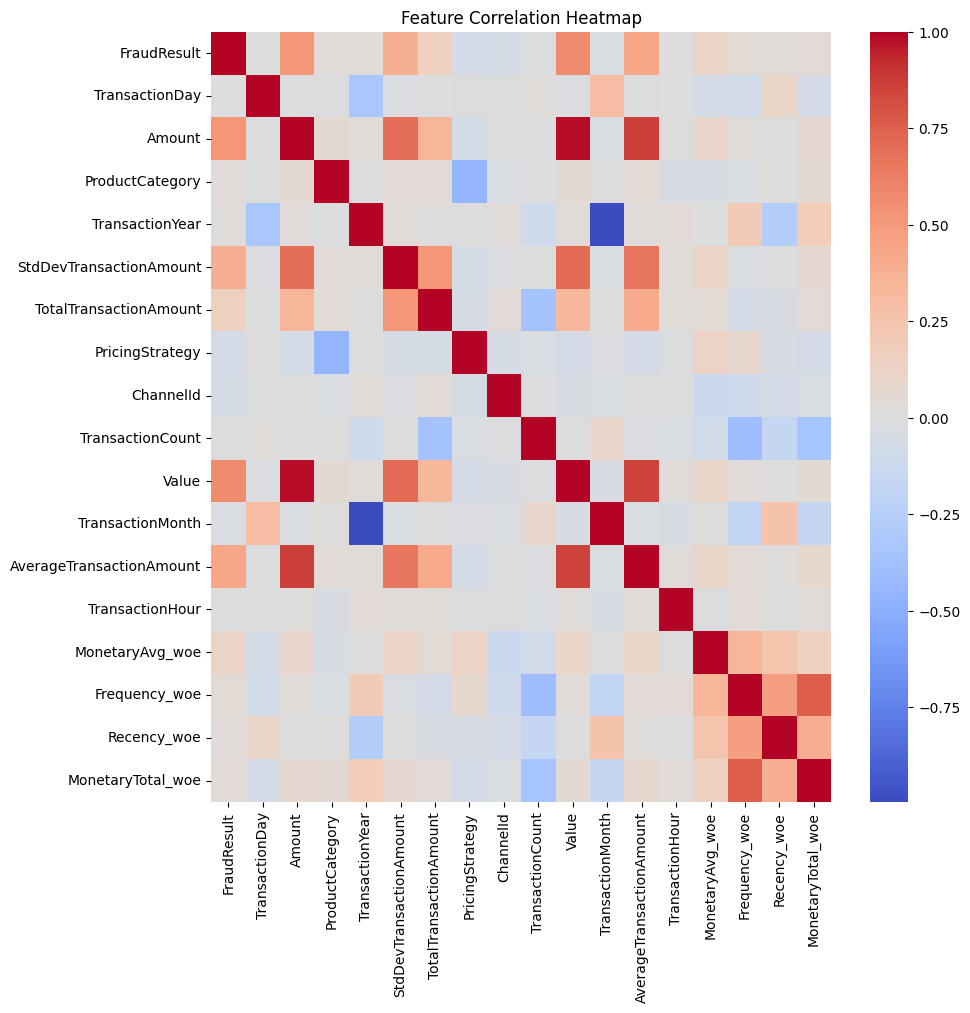

Highly correlated feature pairs:
Amount - Value: 0.98
Amount - AverageTransactionAmount: 0.87
TransactionYear - TransactionMonth: -1.00
Value - AverageTransactionAmount: 0.85


In [14]:
# Analyze feature correlations
analyze_feature_correlations(X)

Let us now split our data into the following sets: training (80%) and test (20%) using SMOTE and stratification

In [15]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

In [17]:
# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

In [18]:
# size of the train and test splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 4252 samples
Testing set size: 749 samples


### Modelling 
 Four models are chosen for the classification task:
    -   Logistic Regression, Random Forest, Gradient Boosting Machine (GBM), Decision Trees

- Model Training: 
    - Each of these models is trained on the training data, with the aim of identifying high-risk customers based on their transactional history and other features.
- Hyperparameter Tuning: 
    - The hyperparameters of each model are fine-tuned using grid search techniques to enhance performance.

-  Model Evaluation
    -   Accuracy: Used to measure the overall correctness of predictions for each model.
    - Precision: Evaluates how many of the predicted defaults were actually correct.
    - Recall (Sensitivity): Measures how well the model identifies actual defaults.
    - F1 Score: A balance between precision and recall, important for handling imbalanced datasets.
    - ROC-AUC: A key metric that evaluates the model’s ability to distinguish between high and low-risk customers. Higher AUC values indicate better performance in classification tasks.

In [19]:
# Create models
logistic_model, dt_model, rf_model, gb_model = create_models()

### Logistic Regression Model 

In [20]:
# Train Logistic Regression model

logistic_model = train_model(logistic_model, X_train, y_train)

Logistic Regression Performance:
Accuracy: 0.9840
Precision: 0.9556
Recall: 0.9908
F1: 0.9729
Roc_auc: 0.9950


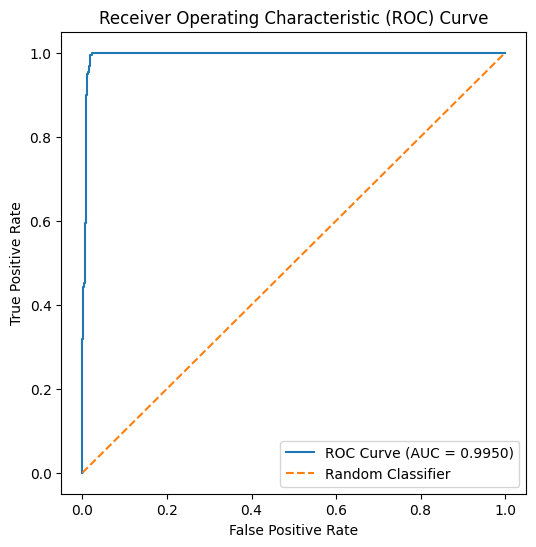

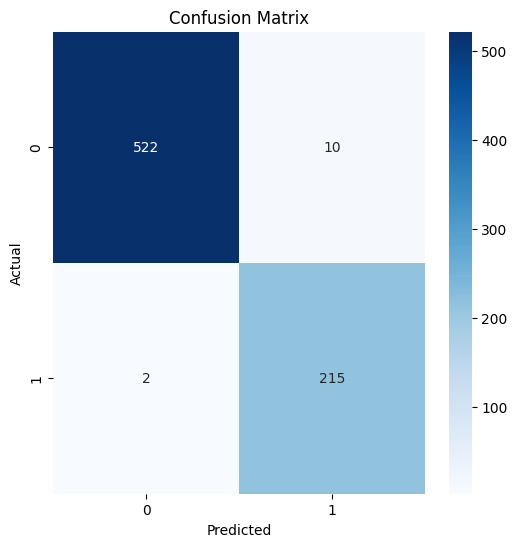

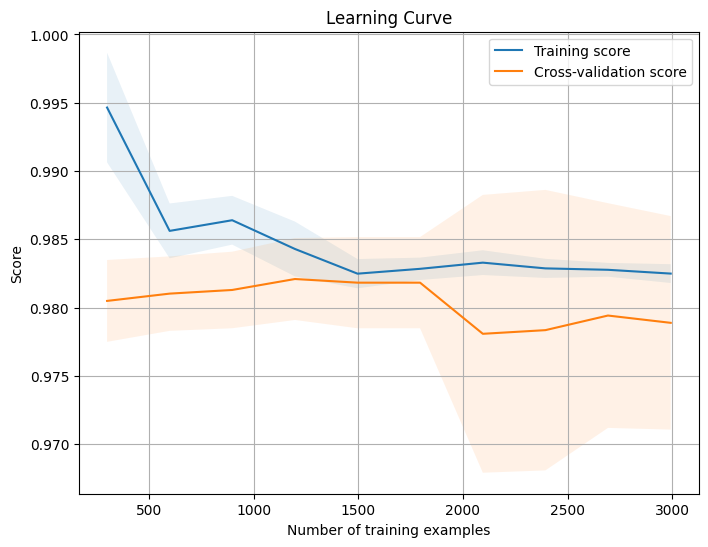

In [21]:
# evaluate Logistic Regression models
print("Logistic Regression Performance:")
logistic_metrics = evaluate_model(logistic_model, X_test, y_test)
for metric, value in logistic_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_roc_curve(logistic_model, X_test, y_test)
plot_confusion_matrix(logistic_model, X_test, y_test)
plot_learning_curve(logistic_model, X, y)

### Decision Tree Model

In [22]:
# Train Decision Tree model
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_dt_model = tune_model(dt_model, X_train, y_train, dt_param_grid)


Decision Tree Performance:
Accuracy: 0.9880
Precision: 0.9727
Recall: 0.9862
F1: 0.9794
Roc_auc: 0.9877


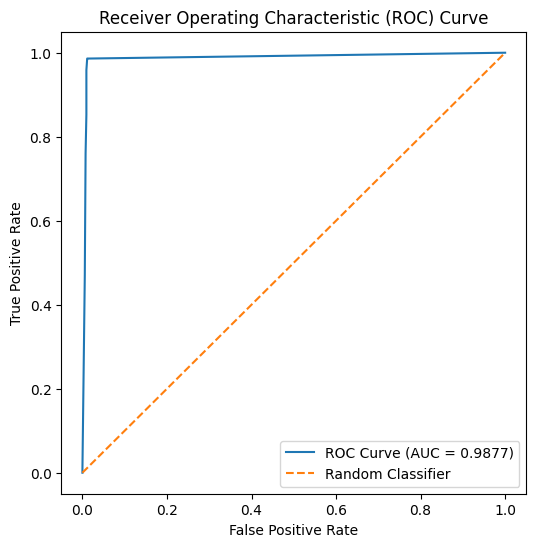

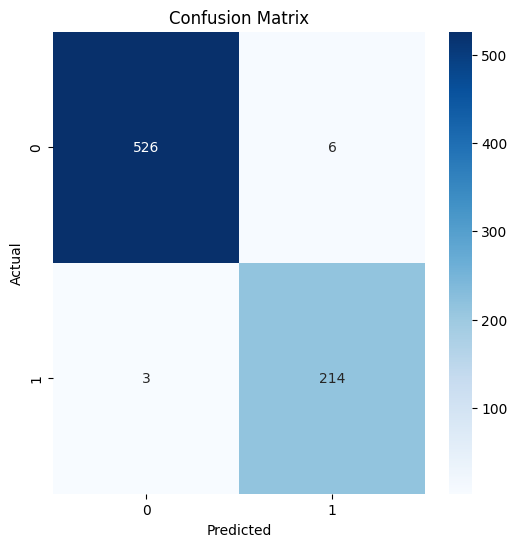

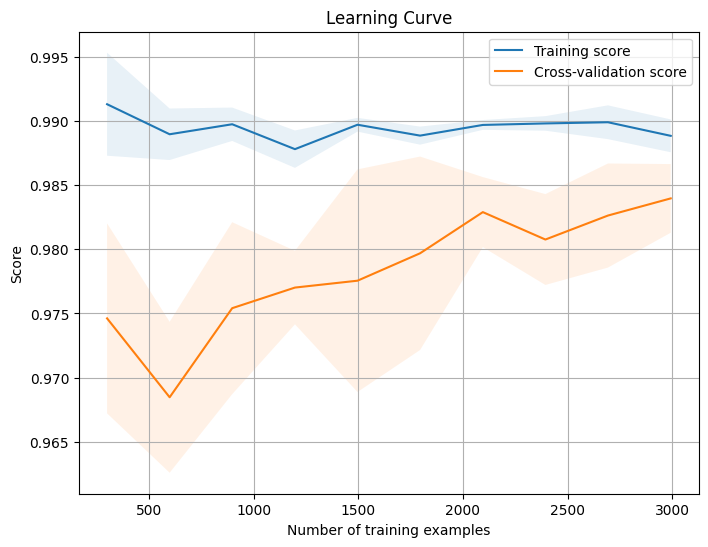

<Figure size 1000x600 with 0 Axes>

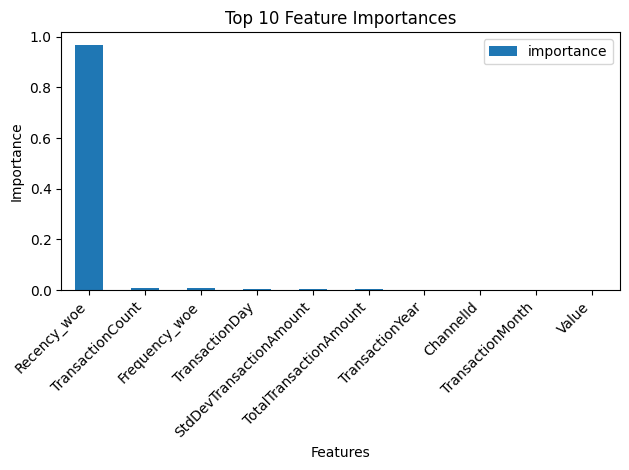

In [23]:
# evaluate Decision Tree model
print("\nDecision Tree Performance:")
dt_metrics = evaluate_model(best_dt_model, X_test, y_test)
for metric, value in dt_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_roc_curve(best_dt_model, X_test, y_test)
plot_confusion_matrix(best_dt_model, X_test, y_test)
plot_learning_curve(best_dt_model, X, y)
plot_feature_importance(best_dt_model, X)

### Random Forest Model

In [24]:
# Train Random Forest model
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_rf_model = tune_model(rf_model, X_train, y_train, rf_param_grid)


Random Forest Performance:
Accuracy: 0.9893
Precision: 0.9729
Recall: 0.9908
F1: 0.9817
Roc_auc: 0.9970


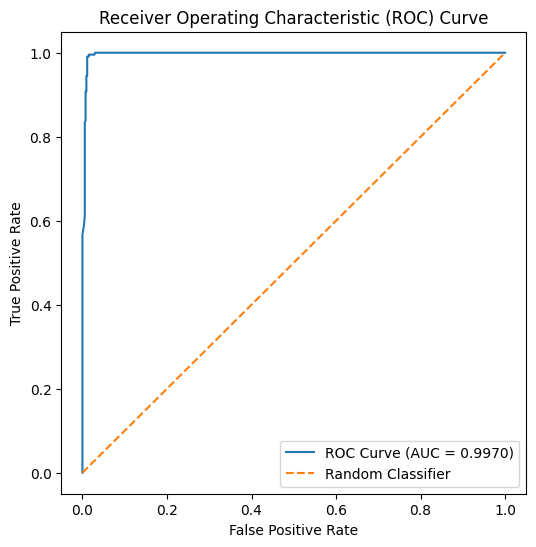

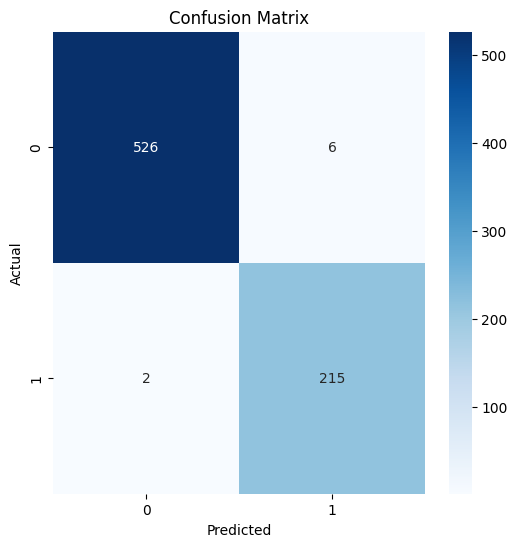

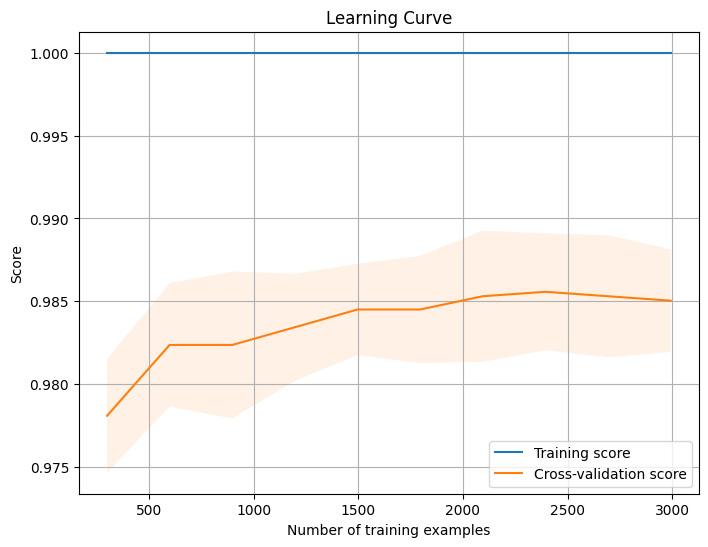

<Figure size 1000x600 with 0 Axes>

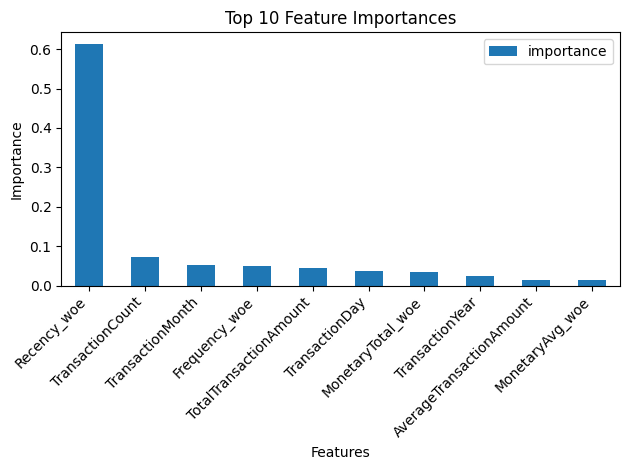

In [25]:
# evaluate Random Forest model
print("\nRandom Forest Performance:")
rf_metrics = evaluate_model(best_rf_model, X_test, y_test)
for metric, value in rf_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_roc_curve(best_rf_model, X_test, y_test)
plot_confusion_matrix(best_rf_model, X_test, y_test)
plot_learning_curve(best_rf_model, X, y)
plot_feature_importance(best_rf_model, X)

### Gradient Boosting Model

In [26]:
# Train Gradient Boosting model
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}
best_gb_model = tune_model(gb_model, X_train, y_train, gb_param_grid)


Gradient Boosting Performance:
Accuracy: 0.9853
Precision: 0.9725
Recall: 0.9770
F1: 0.9747
Roc_auc: 0.9970


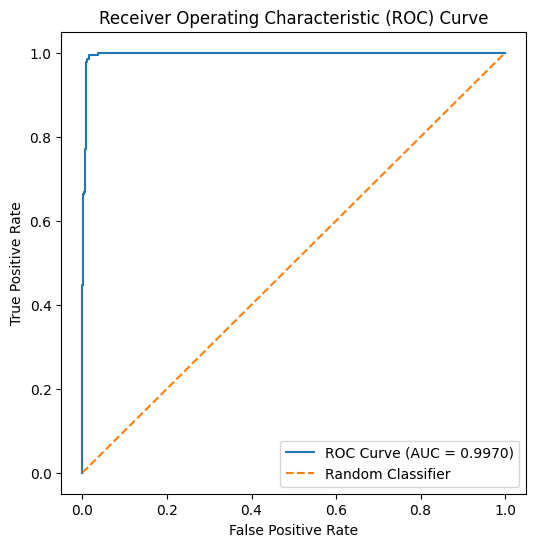

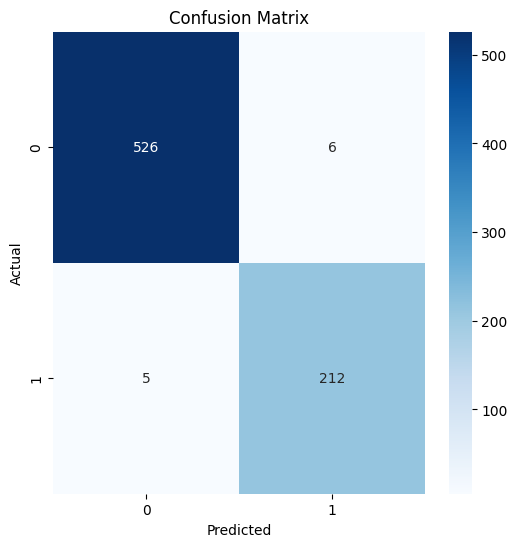

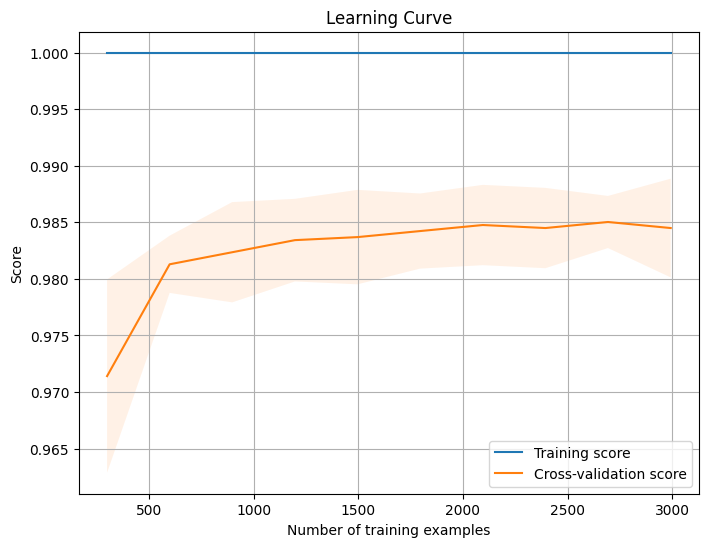

<Figure size 1000x600 with 0 Axes>

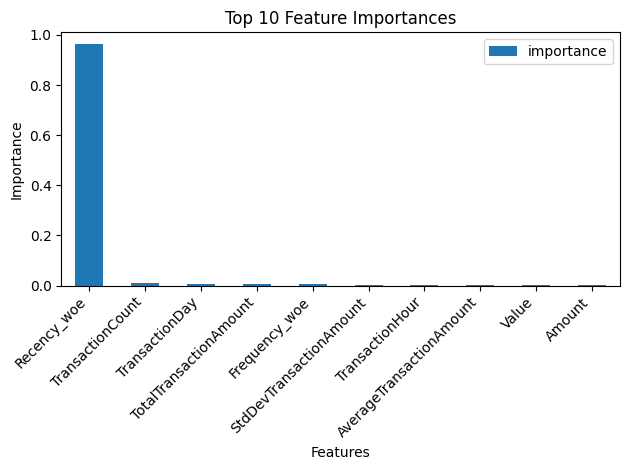

In [27]:
# evaluate Gradient Boosting model
print("\nGradient Boosting Performance:")
gb_metrics = evaluate_model(best_gb_model, X_test, y_test)
for metric, value in gb_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_roc_curve(best_gb_model, X_test, y_test)
plot_confusion_matrix(best_gb_model, X_test, y_test)
plot_learning_curve(best_gb_model, X, y)
plot_feature_importance(best_gb_model, X)

### Compare Models

In [28]:
# Compare models
print("\nModel Comparison:")
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
comparison_df = pd.DataFrame({
    'Logistic Regression': [logistic_metrics[m] for m in metrics],
    'Decision Tree': [dt_metrics[m] for m in metrics],
    'Random Forest': [rf_metrics[m] for m in metrics],
    'Gradient Boosting': [gb_metrics[m] for m in metrics]
}, index=metrics)
print(comparison_df)


Model Comparison:
           Logistic Regression  Decision Tree  Random Forest  \
accuracy              0.983979       0.987984       0.989319   
precision             0.955556       0.972727       0.972851   
recall                0.990783       0.986175       0.990783   
f1                    0.972851       0.979405       0.981735   
roc_auc               0.995037       0.987687       0.996981   

           Gradient Boosting  
accuracy            0.985314  
precision           0.972477  
recall              0.976959  
f1                  0.974713  
roc_auc             0.997003  


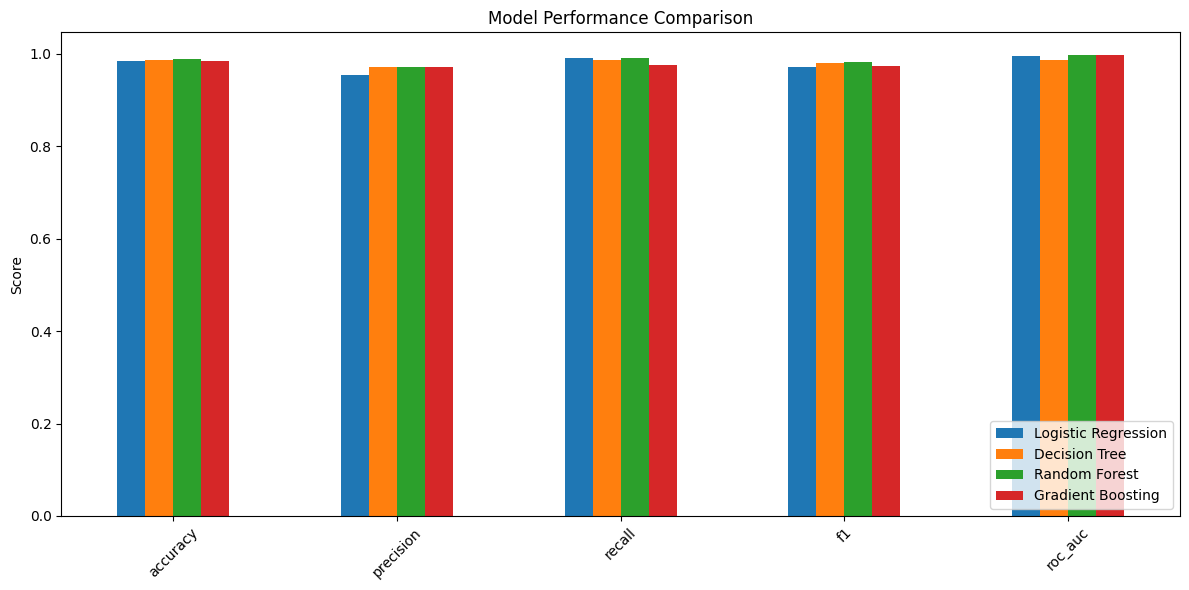

In [29]:
# Visualize the comparison
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [31]:
# Save the best performing model
best_model = max([logistic_model, best_dt_model, best_rf_model, best_gb_model], 
                 key=lambda m: evaluate_model(m, X_test, y_test)['roc_auc'])
save_model(best_model, '../model/best_credit_scoring_model.pkl')

Model saved to ../model/best_credit_scoring_model.pkl
